<a href="https://colab.research.google.com/github/Vikas-KM/machine-learning/blob/master/ML_Projects/Movie%20Recommendation%20System/movie_recommendation_using_cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv


In [ ]:
df = pd.read_csv('/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df['plot_keywords'].head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [ ]:
df['plot_keywords'].isna().sum()

153

In [ ]:
df['plot_keywords'].fillna(' ', inplace=True)
df['plot_keywords'].head()

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                     
Name: plot_keywords, dtype: object

In [ ]:
df['plot_keywords'].isna().sum()

0

In [ ]:
def listtostr(s):
    return ' '.join(map(str, s))

In [ ]:
df['genres'] = df['genres'].apply(listtostr)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: x.split('|'))
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df['plot_keywords'] = df['plot_keywords'].apply(listtostr)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df['movie_title'].loc[0]

'Avatar\xa0'

In [ ]:
df['movie_title'] = df['movie_title'].apply(lambda a:a[:-1])
df['movie_title'].loc[0]

'Avatar'

In [ ]:
# taking important features
df1 = df[['director_name','actor_2_name','genres', 'actor_1_name','movie_title','plot_keywords']].copy()
df1.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,plot_keywords
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,CCH Pounder,Avatar,avatar future marine native paraplegic
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,goddess marriage ceremony marriage proposal pi...
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,Christoph Waltz,Spectre,bomb espionage sequel spy terrorist
3,Christopher Nolan,Christian Bale,Action Thriller,Tom Hardy,The Dark Knight Rises,deception imprisonment lawlessness police offi...
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,


In [ ]:
df1.shape

(5043, 6)

In [ ]:
df1.isna().sum()

director_name    104
actor_2_name      13
genres             0
actor_1_name       7
movie_title        0
plot_keywords      0
dtype: int64

In [ ]:
features = list(df1.columns)
features

['director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'plot_keywords']

In [ ]:
# filling director name and actor name as unknown
for feature in features:
    df1[feature] = df1[feature].fillna('unknown')

In [ ]:
df1.isna().sum()

director_name    0
actor_2_name     0
genres           0
actor_1_name     0
movie_title      0
plot_keywords    0
dtype: int64

In [ ]:
def combine_features(row):
    return row['director_name']+' '+row['actor_2_name']+' '+row['genres']+' '+row['actor_1_name']+' '+row['movie_title']

In [ ]:
df1['combined_features'] = df1.apply(combine_features, axis=1)
df1.head()

,director_name,actor_2_name,genres,actor_1_name,movie_title,plot_keywords,combined_features
0,James Cameron,Joel David Moore,Action Adventure Fantasy Sci-Fi,CCH Pounder,Avatar,avatar future marine native paraplegic,James Cameron Joel David Moore Action Adventur...
1,Gore Verbinski,Orlando Bloom,Action Adventure Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,goddess marriage ceremony marriage proposal pi...,Gore Verbinski Orlando Bloom Action Adventure ...
2,Sam Mendes,Rory Kinnear,Action Adventure Thriller,Christoph Waltz,Spectre,bomb espionage sequel spy terrorist,Sam Mendes Rory Kinnear Action Adventure Thril...
3,Christopher Nolan,Christian Bale,Action Thriller,Tom Hardy,The Dark Knight Rises,deception imprisonment lawlessness police offi...,Christopher Nolan Christian Bale Action Thrill...
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,,Doug Walker Rob Walker Documentary Doug Walker...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cv = CountVectorizer()

In [ ]:
count_matrix = cv.fit_transform(df1["combined_features"]) 

In [ ]:
cosine_sim = cosine_similarity(count_matrix)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def recommend(movie):
    if movie not in df1['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = df1.loc[df1['movie_title']==movie].index[0]
        lst = list(enumerate(cosine_sim[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(df1['movie_title'][a])
        plt.bar(l, [i[1] for i in lst])
        plt.xticks(rotation=90)
        plt.xlabel('similar movies to---> '+movie)
        plt.ylabel('cosine scores')
        return l


['Aliens',
 'Dragonball: Evolution',
 'Blade: Trinity',
 '2012',
 'Dune',
 'The Terminator',
 'Terminator 2: Judgment Day',
 'Wing Commander',
 'RoboCop 3',
 'Lockout']

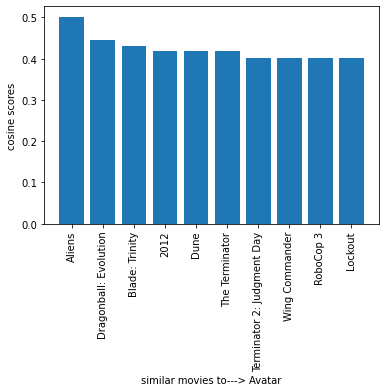

In [ ]:
recommend('Avatar')

['The Dark Knight',
 'Inception',
 'The Prestige',
 'Batman Begins',
 'Shaft',
 'RocknRolla',
 'The Way of the Gun',
 'The Man with the Golden Gun',
 'The Machinist',
 'Harsh Times']

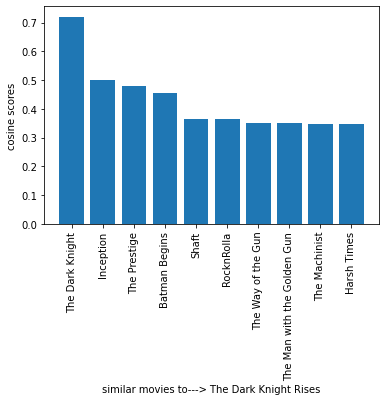

In [ ]:
recommend('The Dark Knight Rises')

In [ ]:
recommend('Iron Man')